# DS2500 Final Report: Youtube Video Analysis and Prediction
## Team 92

- Zhaorui Zhang (zhang.zhaoru@northeastern.edu)
- Yidi Wang (wang.yidi1@northeastern.edu)
- Mason Dubanowitz (Dubanowitz.m@northeastern.edu)
- Dhillon Murphy (murphy.dh@northeastern.edu)
- David Adly (adly.d@northeastern.edu)

# Executive summary

As we’ve seen above there are many ways that YouTube Channels can try to manipulate the system to boost their video’s popularity. While adding more special characters and stronger positive sentiment to video titles indicated little correlation to more views, we found that the only metric with a strong correlation to video popularity is quality. In our project we define video quality as having a low; essentially meaning that a low percentage of viewers dislike the video. Therefore, we can confidently claim that YouTube’s algorithm is fairly unbiased and recommends higher quality videos leading to those videos gaining more views and overall popularity. 

# Introduction

When picking a YouTube video the majority of users base the video's popularity on views. This can be very misleading, timewasting, and leave watchers unsatisfied as a video with high view count doesn't always entail high quality. This discrepancy between quality and popularity is what we consider clickbait. Our goal is to find out which YouTube video metrics lead to more overall popularity through various methods. We will then be able to identify if YouTube’s algorithm is fair and what type of behavior it rewards. This could help content creators as well as users understand what truly makes a video popular so they can more carefully create and select their videos. 

# Data Description


The datasets selected for this project are from this [Kaggle source](https://www.kaggle.com/datasets/sgonkaggle/youtube-trend-with-subscriber) which obtained trending YouTube video statistics for unique video IDs with its subscriber data. Each row represents a relatively trending unique video on Youtube. Mainly Features we will use are:
- publish_date
- publish_hour
- category_id
- channel_title
    - The name of the channel
- views
- likes
- dislikes
- comment_count
- comments_disabled
- ratings_disabled
- tag_appeared_in_title
    - If there is a tag# appeared in the title
- title	
- tags	
- trend_tag_highest
    - The tag's highest trend
- trend_tag_total
    - The count of the trend tags
- tags_count
- subscriber

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load data
df_videos = pd.read_csv("USvideos_modified.csv.zip")
df_videos.head()

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


## Data Cleaning and Preparation

We exclude the column that are not able to be programed at first, such as 'video_id', 'description' etc. But we need to further ensure is there any other columns we need to drop. So, we draw a correlation matrix to present data and help us to make this decision.

Text(0.5, 1.0, 'Correlation of video features')

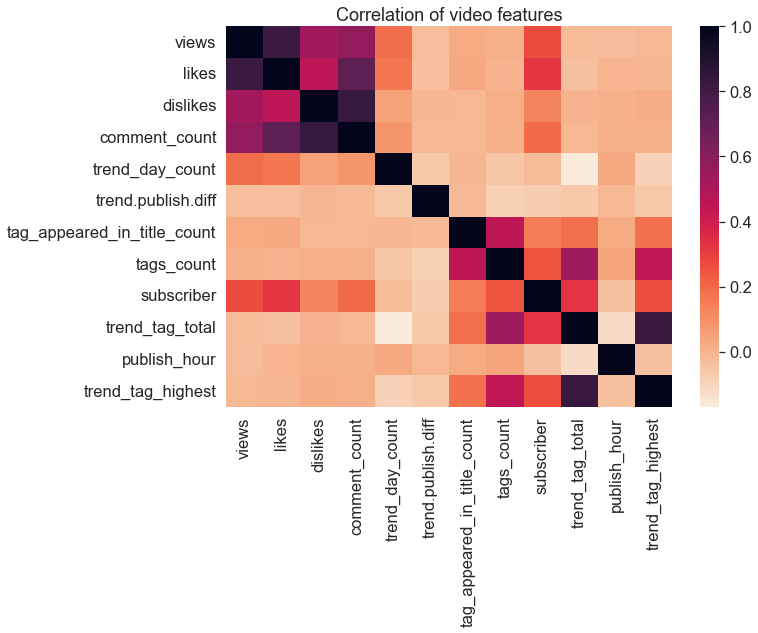

In [2]:
# set the font
sns.set(font_scale=1.5)

# select the features we would like to further compare
df_features = df_videos[['video_id', 'last_trending_date', 'views', 'likes', 'dislikes',
                         'comment_count', 'description', 'trend_day_count', 'trend.publish.diff',
                         'tag_appeared_in_title_count', 'tags_count', 'subscriber', 'trend_tag_total',
                         'publish_hour', 'publish_date', 'trend_tag_highest']]

# get the correlations of the features
cm = df_features.corr()

# plot a heat map
plt.figure()
sns.heatmap(cm, cmap="rocket_r")
plt.gcf().set_size_inches(10, 7)
plt.title("Correlation of video features")

In this correlation matrix, darker the color, higher the correlation. Lighter the color is, means there is smaller or negative correlation. We can find out there are a few columns that are no relationship or negative relationship between others, so we decide the drop them.

In [3]:
# exclude unwanted columns
df_videos = df_videos.drop(labels=['video_id', 'last_trending_date',
                                   'description', 'trend_day_count',
                                   'trend.publish.diff', 'publish_hour',
                                   'publish_date', 'ratings_disabled',
                                   'tag_appeared_in_title',
                                   'tag_appeared_in_title_count'], axis=1)

# drop NaN
df_videos.dropna(axis=0, inplace=True)

df_videos = df_videos.reset_index(drop=True)

df_videos.loc[df_videos['comments_disabled'] == True, 'comments_disabled'] = 1
df_videos.loc[df_videos['comments_disabled'] == False, 'comments_disabled'] = 0

# present data set we will work with
df_videos.head()

,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,22,CaseyNeistat,2564903,96321,7972,22149,0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,2,2,1,9086142.0
1,24,LastWeekTonight,6109402,151250,11508,19820,0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,65,69,4,5937292.0
2,23,Rudy Mancuso,5315471,187303,7278,9990,0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,68,426,23,4191209.0
3,24,Good Mythical Morning,913268,16729,1386,2988,0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,488,1246,28,13186408.0
4,24,nigahiga,2819118,153395,2416,20573,0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,488,1007,14,20563106.0


### We plan to remove outlier. In order to do that, we defined a new function. 

In [4]:
# function to remove extreme outliers
# retaining extreme outliers resulted in box plots that were almost unreadable
# the main portion of the box plot took up only a tiny fraction of the a axis range
    
def remove_outlier(df_in, col_name):
    """ removes major outliers from df
    
    Args: 
        df_in (dataframe): original dataframe
        col_name (str): name of column with outliers
        
    Returns: 
        df_out (dataframe): df without outliers
    """
    # get quartiles
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    
    # Interquartile range
    iqr = q3-q1 
    min_threshold  = q1-1.5*iqr
    max_threshold = q3+1.5*iqr
    
    # create new df without outliers
    df_out = df_in.loc[(df_in[col_name] >  min_threshold) & (df_in[col_name] <  max_threshold)]
    
    return df_out

When we apply this function into different column, the new data set we get will be different. So I plan to only apply this function on the column of data that has the most outliers. And we draw a boxplot to observe which column has the most outliers.

<AxesSubplot:>

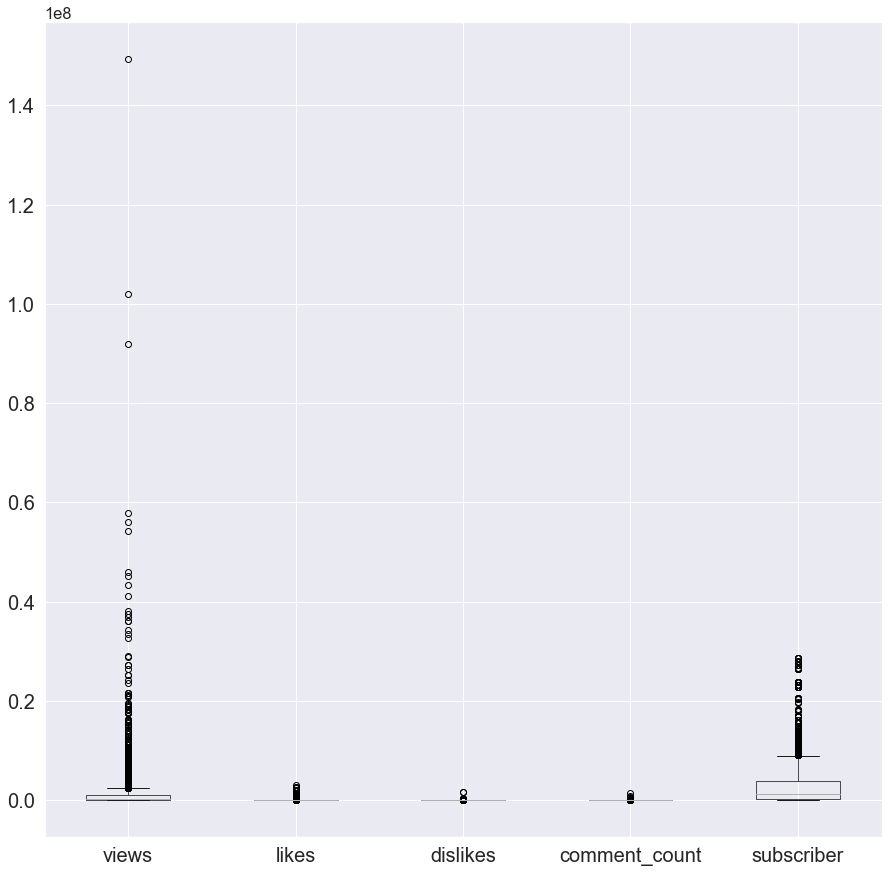

In [5]:
# plot boxplot to observe outliers in listed columns
df_videos.boxplot(column = ['views', 'likes', 'dislikes', 'comment_count', 'subscriber'], 
                      figsize = (15,15), grid = True, fontsize=20)

In [6]:
# df_videos_cleaned = remove_outlier(df_video, 'views')
# df_videos = df_videos.reset_index(drop=True)
# df_videos_cleaned

We found out "views" contains the most outliers and apply remove_outlier function to views(as the last cell shown). HOWEVER, we commented this cell because the cleaned data set will lose data representative and not able to prove our hypothesis. Our graphs also looks terrible when we plot them using cleaned data. The reason is, the data source we chose from Kaggle is already modified, the further cleaning step 'remove_outlier' is unnesscery.

### The processed data set we will work on

In [7]:
# get the number of samples and features
df_videos.shape

(4323, 13)

In [8]:
# describe the attributes
df_videos.describe()

,category_id,views,likes,dislikes,comment_count,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4323.000000,4.323000e+03,4.323000e+03,4.323000e+03,4.323000e+03,4323.000000,4323.000000,4323.000000,4.323000e+03
mean,20.433495,1.287704e+06,4.054220e+04,2.689891e+03,5.111922e+03,136.931529,460.272496,20.160768,3.286955e+06
std,7.287061,4.600416e+06,1.452393e+05,3.754876e+04,3.187484e+04,151.303424,624.237477,11.993590,4.896691e+06
min,1.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00
25%,17.000000,9.647400e+04,1.643500e+03,8.150000e+01,2.490000e+02,30.000000,83.000000,10.000000,3.136620e+05
50%,24.000000,3.301910e+05,7.802000e+03,3.030000e+02,8.960000e+02,91.000000,233.000000,19.000000,1.346352e+06
75%,25.000000,1.024220e+06,2.648300e+04,1.042000e+03,2.939000e+03,158.000000,543.000000,29.500000,3.808198e+06
max,43.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,488.000000,3644.000000,69.000000,2.867694e+07


## HYPOTHESIS 1: Videos have titles that contains more capital letters and special characters can attracts more views.
We think capitalize title and add more special character will make a video stands out and attract audience to click and watch that video, so we made this assumption.

We defined a new function to calculate the ratio of special character and capital letter in a title , and apply it to all the title, then add new column of title_special_score to the data frame.

In [9]:
# determines if the given title contains upper letters, !, and ?
# and get the ratio of the special to the total length of the title

def contains_speical(title):
    special_count = 0
    total_length = 0
    
    for char in title:
        
        if char != ' ':
            total_length += 1
        
        if char.isupper() or char == '!' or char =='?':
            special_count += 1
            
    return round(special_count / total_length, 4)

In [10]:
# add a column show's the special score
for i in range(len(df_videos['title'])):  
    df_videos.loc[i, 'title_special_score'] = contains_speical(df_videos.loc[i, 'title'])
    
df_videos.head()

,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score
0,22,CaseyNeistat,2564903,96321,7972,22149,0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,2,2,1,9086142.0,1.0000
1,24,LastWeekTonight,6109402,151250,11508,19820,0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,65,69,4,5937292.0,0.2075
2,23,Rudy Mancuso,5315471,187303,7278,9990,0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,68,426,23,4191209.0,0.1818
3,24,Good Mythical Morning,913268,16729,1386,2988,0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,488,1246,28,13186408.0,0.1786
4,24,nigahiga,2819118,153395,2416,20573,0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,488,1007,14,20563106.0,0.7000


The video 0: "WE WANT TO TALK ABOUT OUR MARRIAGE" is all capitalized and have title_special_score 1, but title writtern in standard form, that means only capitalized the first letter of each word, will have that score around 0.2.

We would like to investgate the relationship between ratio of special character and capital letter and views of corresponding view, and we use plot to visualize.

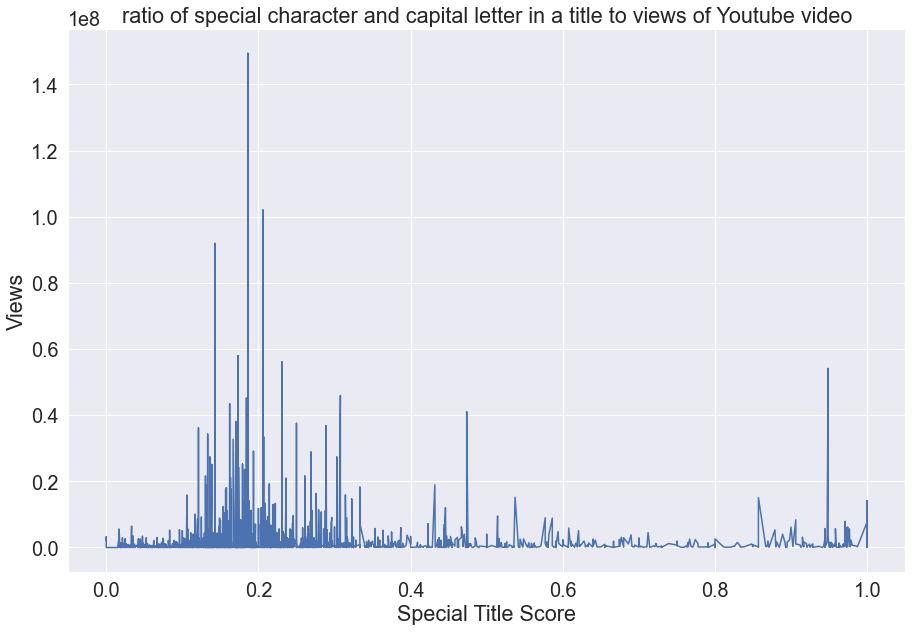

In [11]:
# set the font
sns.set(font_scale=1.8)

# plot the relationship between title_special_score and views
plt.plot(df_videos.sort_values('title_special_score', ascending=True)['title_special_score'],
        df_videos.sort_values('title_special_score', ascending=True)['views'])

plt.gcf().set_size_inches(15, 10)
plt.xlabel('Special Title Score')
plt.ylabel('Views')
plt.savefig('specialTitle.png')
plt.title('ratio of special character and capital letter in a title to views of Youtube video')
plt.show()


We reject this hypothesis. There is no explicit positive correlation between the using of capital letters and special characters of youtube video title and their corresponding popularity. Instead, most of the popular video titles are in standard form which have title_special_score around 0.2. People may pay more attention to what titles say instead of form of them.

## HYPOTHESIS 2: Videos that use more tags are more likely to get views.


People would always add many attracting tags to get the audience attention, so we might easily assume that the number of the tags could have some relationship to the views. Therefore, we used the tags of the videos to plot the correlation between views.

In [12]:
# initialize a dictionary to count tags
tag_count = dict()

for each in df_videos['tags']:
    # split and collect the tags
    tag = str(each).split("|")
    
    # count the num of tags
    for item in tag:
        
        if item not in tag_count:
            tag_count[item] = 1
        else:
            tag_count[item] += 1

# sort the tag count
sort_tag_count = sorted(zip(tag_count.values(), tag_count.keys()), reverse = True)

# Show the most frequently used tags in the entire data set
sort_tag_count[:20]

[(418, 'funny'),
 (322, 'comedy'),
 (191, 'humor'),
 (152, 'interview'),
 (144, 'news'),
 (141, 'celebrities'),
 (139, '2017'),
 (137, 'video'),
 (136, 'music'),
 (134, 'celebrity'),
 (131, 'comedian'),
 (129, 'funny video'),
 (127, '2018'),
 (120, 'science'),
 (119, 'jokes'),
 (119, 'food'),
 (119, 'Comedy'),
 (117, 'how to'),
 (112, 'NBC'),
 (108, 'show')]

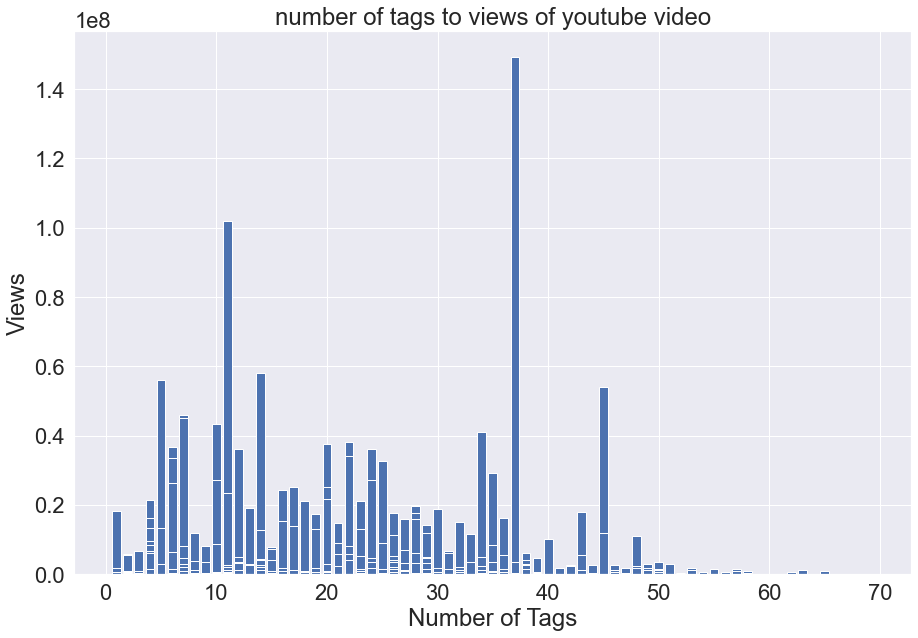

In [13]:
# set the font
sns.set(font_scale=2)

# plot the relationship between tags_count and views
plt.bar(df_videos.sort_values('tags_count', ascending=True)['tags_count'],
        df_videos.sort_values('tags_count', ascending=True)['views'])

plt.gcf().set_size_inches(15, 10)
plt.xlabel('Number of Tags')
plt.ylabel('Views')
plt.savefig('tags.png')
plt.title('number of tags to views of youtube video')

plt.show()

Through the plot we could see that there is no clear data distribution between the number of tags and views. Therefore, we need to reject the hypothesis, and it shows us that the number of tags does not really affect the views.

## HYPOTHESIS 3 : Higher Quality Videos lead to more Views.

The comments and feedbacks of the audience are always important, the likes and dislikes may affect the uploader's directly. Therefore, we might assume that the number of dislikes could affect the views. In order to achieve that analysis, we added a column to the dataframe to compute the dislike to views ratio and then check if there is any relationship to the views itself

In [14]:
# Adding a new column to the dataset that calculates the ratio of dislike and views
# it can be seem as a indicator of quality of video
df_videos['dislike_ratio'] = (df_videos.loc[:, 'dislikes'] / df_videos.loc[:, 'views']) * 100 

In [15]:
df_videos.head()

,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio
0,22,CaseyNeistat,2564903,96321,7972,22149,0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,2,2,1,9086142.0,1.0000,0.310811
1,24,LastWeekTonight,6109402,151250,11508,19820,0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,65,69,4,5937292.0,0.2075,0.188365
2,23,Rudy Mancuso,5315471,187303,7278,9990,0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,68,426,23,4191209.0,0.1818,0.136921
3,24,Good Mythical Morning,913268,16729,1386,2988,0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,488,1246,28,13186408.0,0.1786,0.151763
4,24,nigahiga,2819118,153395,2416,20573,0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,488,1007,14,20563106.0,0.7000,0.085701


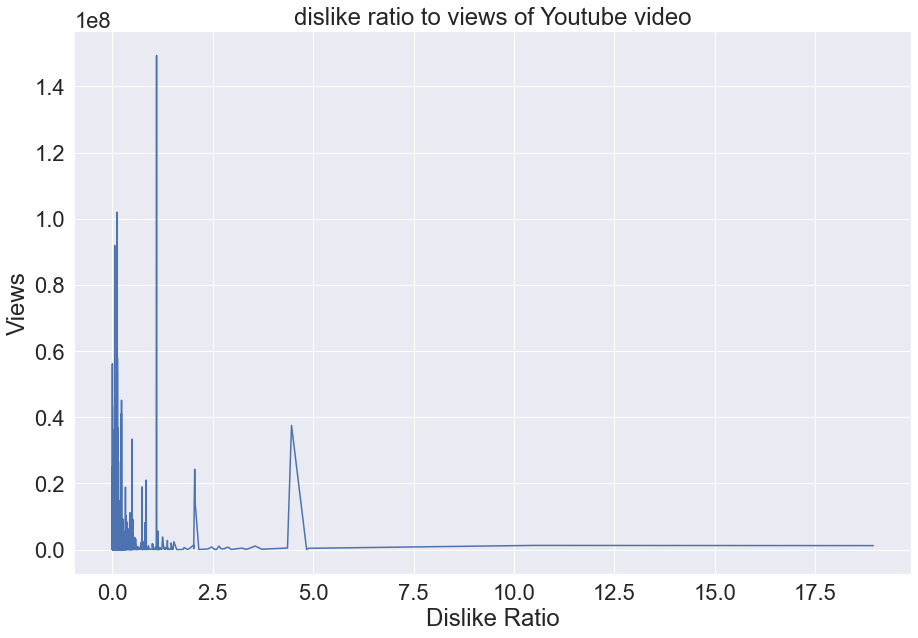

In [16]:
# set the font
sns.set(font_scale=2)

# plot the relationship between dislike_ratio and views
plt.plot(df_videos.sort_values('dislike_ratio', ascending=True)['dislike_ratio'],
        df_videos.sort_values('dislike_ratio', ascending=True)['views'])

plt.gcf().set_size_inches(15, 10)
plt.xlabel('Dislike Ratio')
plt.ylabel('Views')
plt.savefig('dislikeRatio.png')
plt.title("dislike ratio to views of Youtube video")
plt.show()


The y-axis has the amount of views in millions and the x-axis has the dislike ratio (views/dislikes).
You can clearly see a trend in this graph. As the dislike ratio becomes greater the amount of views decreases. It does not appear that this correlation is linear but there is an inverse relationship nonetheless. From this graph we can conclude that greater quality vides (vides with low dislike ratio) have greater views. Our hypothesis is correct.

## HYPHOTHESIS 4: Titles/tags at either extreme of the polarity scale may be more likely to be clickbait.
We thought that perhaps more negative or more positive titles / search tags would result in a greater amount of views. 

We found out that this was untrue for search tags, and instead that the most viewed videos not only were more neutral, but they were centered around neutrality as pertains to views. 

This might be because the algorithm on youtube does not recommend highly polarizing videos. A polarizing video might have negative or salacious tags, and therefore is deranked as it might upset many viewers in one way or another. It is clear that youtube has pivoted away from reccomending videos that have very negative or very positive tags.

However, video titles might be a little more favoring to very positive rather than very negative tags. At the extreme (1 for positivity polarity) we see a slight uptick in the views of a video. However, at the opposite end there are less videos with highly negative titles and higher views. Overall it again is centered for neutrality, which makes sense given that youtube does not want to recommend highly polarizing videos which could jeopardize view time. 

The naturally occuring preference for the mean in the tags and the titles for polarity means that youtube's recommendation system highly disfavors polarizing videos as of this data.

In [17]:
!pip install textblob

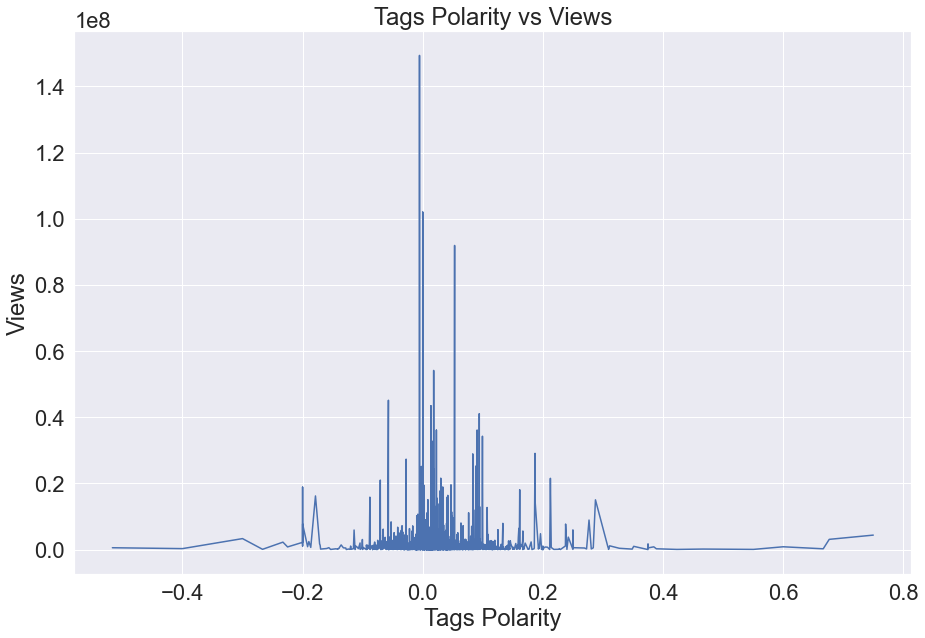

In [18]:
import textblob as tb
import numpy as np

# first ge tthe tags of the video
tags = df_videos['tags'].values

# initialize a list to store the polarity of the tags
polarity = []

for tag in tags:
    # split the tags
    tag = str(tag).split("|")
    
    # initialize a list to store the polarity of each tag
    tag_polarity = []
    
    for item in tag:
        # get the polarity of each tag
        tag_polarity.append(tb.TextBlob(item).sentiment.polarity)
        
    # get the average polarity of the tags
    polarity.append(np.mean(tag_polarity))

# add the polarity to the dataframe
df_videos['tags_polarity'] = polarity

# find out if the polarity is related to the views

# set the font
sns.set(font_scale=2)

# plot the relationship between tags_polarity and views
plt.plot(df_videos.sort_values('tags_polarity', ascending=True)['tags_polarity'],
        df_videos.sort_values('tags_polarity', ascending=True)['views'])

plt.gcf().set_size_inches(15, 10)
# title
plt.title('Tags Polarity vs Views')
plt.xlabel('Tags Polarity')
plt.ylabel('Views')
plt.show()

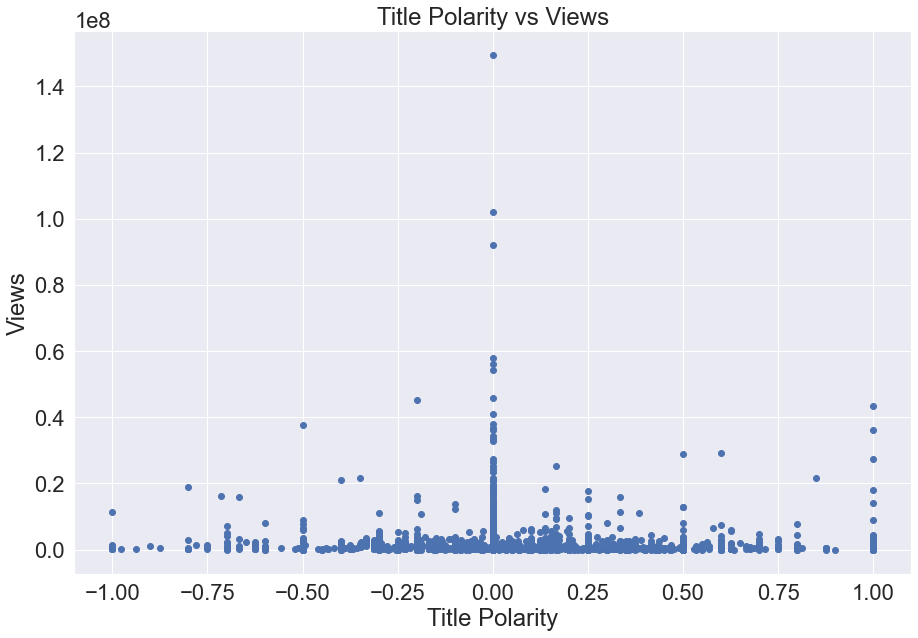

In [19]:
# textblob for sentiment analysis
import textblob as tb

# get the title of the video
titles = df_videos['title'].values

# initialize a list to store the polarity of the titles
polarity = []

for title in titles:
    # get the polarity of the title
    polarity.append(tb.TextBlob(title).sentiment.polarity)

# add the polarity to the dataframe
df_videos['title_polarity'] = polarity

# plot the relationship between title_polarity and views with a scatter plot
plt.scatter(df_videos.sort_values('title_polarity', ascending=True)['title_polarity'],
        df_videos.sort_values('title_polarity', ascending=True)['views'])

# title
plt.title('Title Polarity vs Views')
    
plt.gcf().set_size_inches(15, 10)
plt.xlabel('Title Polarity')
plt.ylabel('Views')
plt.show()

# Experiments, trials, and challenges that we didn't present (besides machine learning)

### The plan of predicting clickbait

Our original plan is use this data set to predict [clickbait](https://en.wikipedia.org/wiki/Clickbait) in Youtube videos, but it is difficult to explain the relationship between clickbait(a subjective concept) and video quality; and when we label whether a video is a clickbait or not, there is a bug that we are not able to fix it.

In [20]:
# Adding a new column to the dataset that calculates the amount of views per dislike
df_videos['dislike_ratio'] = df_videos.loc[:, 'views'] / df_videos.loc[:, 'dislikes']

In [21]:
# Gets the videos in the worst 10% of dislike ratio
bottom_ten = df_videos['dislike_ratio'].quantile(0.1)

for i in range(len(df_videos)):
    if df_videos.loc[i, 'dislike_ratio'] <= bottom_ten:
        df_videos['clickbait'] = True
    elif df_videos.loc[i, 'dislike_ratio'] > bottom_ten:
        df_videos['clickbait'] = False

In [22]:
# double check how many videos are determined as a 'clickbait'
bool_true = df_videos['clickbait'] == True
df_true = df_videos.loc[bool_true, :]
df_true

,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,clickbait


There is no video labeled as clickbait when we set bottom_ten as a standard.

However, if we changed the quantile to 0.26, all the videos are selected as clickbait videos.

In [23]:
# Gets the videos in the worst 26% of dislike ratio
bottom_ten = df_videos['dislike_ratio'].quantile(0.26)

for i in range(len(df_videos)):
    if df_videos.loc[i, 'dislike_ratio'] <= bottom_ten:
        df_videos['clickbait'] = True
    elif df_videos.loc[i, 'dislike_ratio'] > bottom_ten:
        df_videos['clickbait'] = False

In [24]:
# double check how many videos are determined as a 'clickbait'
bool_true = df_videos['clickbait'] == True
df_true = df_videos.loc[bool_true, :]
df_true

,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,clickbait
0,22,CaseyNeistat,2564903,96321,7972,22149,0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,2,2,1,9086142.0,1.0000,321.738961,0.000000,0.000000,True
1,24,LastWeekTonight,6109402,151250,11508,19820,0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,65,69,4,5937292.0,0.2075,530.883038,0.000000,0.000000,True
2,23,Rudy Mancuso,5315471,187303,7278,9990,0,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,68,426,23,4191209.0,0.1818,730.347760,0.018116,0.000000,True
3,24,Good Mythical Morning,913268,16729,1386,2988,0,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,488,1246,28,13186408.0,0.1786,658.923521,0.057143,-0.750000,True
4,24,nigahiga,2819118,153395,2416,20573,0,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,488,1007,14,20563106.0,0.7000,1166.853477,-0.075000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,28,Techquickie,230223,10926,446,791,0,Why Are Progress Bars Wrong So Often?,progress|bar|estimate|time|windows|inaccurate|...,25,102,23,1980988.0,0.2581,516.195067,-0.034783,-0.500000,True
4319,28,Tech Insider,128591,2924,316,564,0,Why Does Bluetooth Still Suck?,Tech Insider|TI|Tech|Science|Innovation|Digita...,140,407,17,1420833.0,0.2308,406.933544,0.000000,0.000000,True
4320,26,Gemma Stafford,55076,3436,35,621,0,Crazy Frosting Recipe: The Best Buttercream Fr...,Frosting|Crazy Frosting|Buttercream Frosting|B...,75,147,24,1549469.0,0.1486,1573.600000,0.200000,0.081250,True
4321,20,Scott Manley,48505,2504,17,350,0,How Satellites Capture 400 Megapixel Images Of...,himawari|goes-16|goes-r|goes-s|weather|meteoro...,13,20,8,692776.0,0.1857,2853.235294,0.000000,0.000000,True


## Compare data distribution among different types of video

In [25]:
# count the videos by the category
df_videos.groupby('category_id').count()


,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,clickbait
category_id,,,,,,,,,,,,,,,,,
1,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207
2,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
10,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550
15,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
17,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
19,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
20,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
22,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
23,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368


In [26]:
# ID -> Category Name
# 1 --> Film and animation
# 2 --> Autos and vehicles
# 10 --> Music
# 15 --> Pets and Animals
# 17 --> Sports
# 19 --> Travel and Events
# 20 --> Gaming
# 22 --> People and Blogs
# 23 --> Comedy
# 24 --> Entertainment
# 25 --> News and politics
# 26 --> How to style
# 27 --> Education
# 28 --> Science and Technology
# 29 --> Non-profits and Activism
# 43 --> Shows

### We can find out Entertainment videos and Music videos has the largest proportion in our data set

In [27]:
# select ENTERTAINMENT videos and create a new dataframe
entertainment = df_videos['category_id'] == 24

df_entertainment = df_videos.loc[entertainment, :]

df_entertainment = df_entertainment.reset_index(drop=True)

# add a new dislike_views_ratio for the visualization later
for i in range(len(df_entertainment['dislikes'])): 
    df_entertainment.loc[i, 'dislike_views_ratio'] = \
    df_entertainment.loc[i, 'dislikes'] / df_entertainment.loc[i, 'views']
    
df_entertainment.sort_values('views', ascending=False)

,category_id,channel_title,views,likes,dislikes,comment_count,comments_disabled,title,tags,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,clickbait,dislike_views_ratio
271,24,YouTube Spotlight,149376127,3093544,1643059,810698,0,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,Rewind|Rewind 2017|youtube rewind 2017|#YouTub...,69,293,37,27221198.0,0.1860,90.913429,-0.005405,0.00,True,0.010999
197,24,Marvel Entertainment,91933007,2625661,53709,350458,0,Marvel Studios' Avengers: Infinity War Officia...,marvel|comics|comic books|nerdy|geeky|super he...,41,142,11,6287032.0,0.1429,1711.687185,0.053030,0.00,True,0.000584
300,24,Universal Pictures,38070298,550348,27824,50935,0,Jurassic World: Fallen Kingdom - Official Trai...,Jurassic World|Fallen Kingdom|Jurassic Park|T-...,11,93,22,1446544.0,0.1702,1368.253953,0.000000,0.00,True,0.000731
528,24,Logan Paul Vlogs,37539570,1402578,1674420,1361580,0,So Sorry.,logan paul vlog|logan paul|logan|paul|olympics...,441,818,20,16927506.0,0.2500,22.419447,0.000000,-0.50,True,0.044604
839,24,Universal Pictures,21113889,254342,7076,20099,0,Jurassic World: Fallen Kingdom - Official Trai...,Jurassic World|Fallen Kingdom|Dinosaur|T-Rex|C...,11,88,18,1446544.0,0.1633,2983.873516,0.000000,0.00,True,0.000335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,24,TNT,2085,35,3,8,0,This Is Us: Press Room Q&A | 24th Annual SAG A...,SAG awards|24th annual SAG awards|SAG red carp...,31,70,10,119464.0,0.3333,695.000000,0.000000,0.00,True,0.001439
319,24,Access Hollywood,1774,14,5,10,0,Danny Masterson Fired From Netflix Series 'The...,Access Hollywood|danny masterson the ranch fir...,164,809,24,156448.0,0.1605,354.800000,0.000000,0.00,True,0.002818
155,24,John Sellars,1689,7,0,2,0,Ford Thunderbird SC commercial (1989),1989|80s commercial|kamr|amarillo|texas|miami ...,126,149,9,157.0,0.1212,inf,0.000000,0.00,True,0.000000
826,24,9-1-1 on FOX,1426,14,0,0,0,First Responders Arrive To The Collapsed Floor...,9-1-1|first responders|police|firefighters|fox...,23,113,36,8871.0,0.1552,inf,0.015278,0.25,True,0.000000


In [28]:
df_entertainment.describe()

,category_id,views,likes,dislikes,comment_count,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,dislike_views_ratio
count,1059.0,1.059000e+03,1.059000e+03,1.059000e+03,1.059000e+03,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,24.0,1.335977e+06,3.430807e+04,4.928427e+03,6.140736e+03,183.519358,673.647781,22.497639,3.827155e+06,0.259916,inf,0.017746,0.056713,0.001658
std,0.0,5.927021e+06,1.505453e+05,7.277182e+04,5.238650e+04,180.159272,838.290110,10.698159,5.743430e+06,0.200004,NaN,0.047949,0.249666,0.002985
min,24.0,1.402000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000,22.419447,-0.300000,-1.000000,0.000000
25%,24.0,1.077465e+05,1.694500e+03,1.010000e+02,2.495000e+02,39.000000,114.500000,13.000000,3.734685e+05,0.161300,573.108277,0.000000,0.000000,0.000469
50%,24.0,3.732530e+05,6.824000e+03,3.080000e+02,7.850000e+02,119.000000,331.000000,24.000000,1.568812e+06,0.193500,1131.034125,0.006667,0.000000,0.000884
75%,24.0,1.062020e+06,2.403600e+04,1.064500e+03,2.689000e+03,441.000000,956.500000,30.000000,3.965373e+06,0.250000,2130.026832,0.030866,0.105556,0.001745
max,24.0,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,488.000000,3644.000000,65.000000,2.722120e+07,1.000000,inf,0.375000,1.000000,0.044604


We seperated our data in 3 categories: Entertainment, Music, and Politics. The Table above shows the data we have compiled for entertainment. The table above puts everything in quartiles so we can easily compare this data to the other categories and make accurate assumptions. 

In [29]:
# select MUSIC videos and create a new dataframe

music = df_videos['category_id'] == 10

df_music = df_videos.loc[music, :]
df_music = df_music.reset_index(drop=True)

# add a new dislike_views_ratio for the visualization later
for i in range(len(df_music['dislikes'])): 
    df_music.loc[i, 'dislike_views_ratio'] = \
    df_music.loc[i, 'dislikes'] / df_music.loc[i, 'views']

In [30]:
df_music.describe()

,category_id,views,likes,dislikes,comment_count,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,dislike_views_ratio
count,550.0,5.500000e+02,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000
mean,10.0,3.163679e+06,1.246224e+05,4069.314545,10354.760000,76.552727,190.798182,13.780000,3.966361e+06,0.222738,inf,0.019504,0.067757,0.001230
std,0.0,7.946953e+06,2.952544e+05,13590.962705,36326.761423,65.749787,216.781401,10.321109,5.646369e+06,0.135056,NaN,0.057911,0.228836,0.002375
min,10.0,1.808000e+03,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,20.481485,-0.200000,-0.800000,0.000000
25%,10.0,1.778082e+05,5.409250e+03,145.000000,401.000000,23.000000,52.000000,6.000000,2.601132e+05,0.160000,777.242824,0.000000,0.000000,0.000565
50%,10.0,6.186710e+05,2.366850e+04,555.000000,1657.000000,58.000000,136.000000,10.000000,1.299334e+06,0.187100,1202.459010,0.000000,0.000000,0.000832
75%,10.0,2.394745e+06,1.115465e+05,2201.000000,7085.750000,124.000000,246.750000,20.000000,6.358719e+06,0.228275,1769.291114,0.028346,0.118750,0.001287
max,10.0,1.020126e+08,2.729292e+06,165109.000000,546100.000000,488.000000,1502.000000,50.000000,2.867694e+07,1.000000,inf,0.600000,1.000000,0.048825


We select POLITICS AND NEWS videos and create a new dataframe, because we assume this kind of video have high controvsey, and higher inconsistency of audience attitude.

In [31]:
politics = df_videos['category_id'] == 25

df_politics = df_videos.loc[politics, :]
df_politics = df_politics.reset_index(drop=True)

# add a new dislike_views_ratio for the visualization later
for i in range(len(df_politics['dislikes'])): 
    df_politics.loc[i, 'dislike_views_ratio'] = \
    df_politics.loc[i, 'dislikes'] / df_politics.loc[i, 'views']

In [32]:
df_politics.describe()

,category_id,views,likes,dislikes,comment_count,trend_tag_highest,trend_tag_total,tags_count,subscriber,title_special_score,dislike_ratio,tags_polarity,title_polarity,dislike_views_ratio
count,413.0,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000
mean,25.0,3.264077e+05,4434.891041,1290.077482,1616.881356,97.690073,276.854722,16.564165,1.262676e+06,0.131397,inf,0.020462,0.008101,0.003947
std,0.0,5.713513e+05,8834.843164,6931.716968,3554.609244,76.478348,233.760724,11.128284,1.382527e+06,0.085646,NaN,0.048269,0.200459,0.007685
min,25.0,5.590000e+02,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,9.537251,-0.266667,-0.700000,0.000000
25%,25.0,2.996800e+04,208.000000,48.000000,102.000000,39.000000,92.000000,7.000000,2.428800e+05,0.060600,243.685455,0.000000,0.000000,0.000808
50%,25.0,1.197840e+05,853.000000,222.000000,544.000000,86.000000,230.000000,13.000000,6.305080e+05,0.115400,627.777778,0.000000,0.000000,0.001593
75%,25.0,4.022440e+05,3756.000000,802.000000,1591.000000,183.000000,419.000000,27.000000,2.119249e+06,0.189200,1237.982558,0.041667,0.000000,0.004104
max,25.0,5.755949e+06,89696.000000,132439.000000,38936.000000,488.000000,1418.000000,46.000000,7.552015e+06,0.512800,inf,0.327273,1.000000,0.104852


### Conclusion:
Music has the most views on average. Music and entertainment seem to get the most audience interaction over the politcal videos. We can see that entertainment and Music have similar features. For example, Entertainment has the highest "title specialty score" at around 0.25 and Music comes in second at 0.22. Though Entertainment and Music have have a lots of views, Political videos have the lowest dislike to view ratio. We can assume/hypothesize that the title specialty score does somewhat equate to views based on the tables above.

### We try to draw a scatter plot to see the divergence, consistency, and distribution of data between these three types of video, and compare them to all category of videos to see which category of video has the relatively high representative of the entire data set.

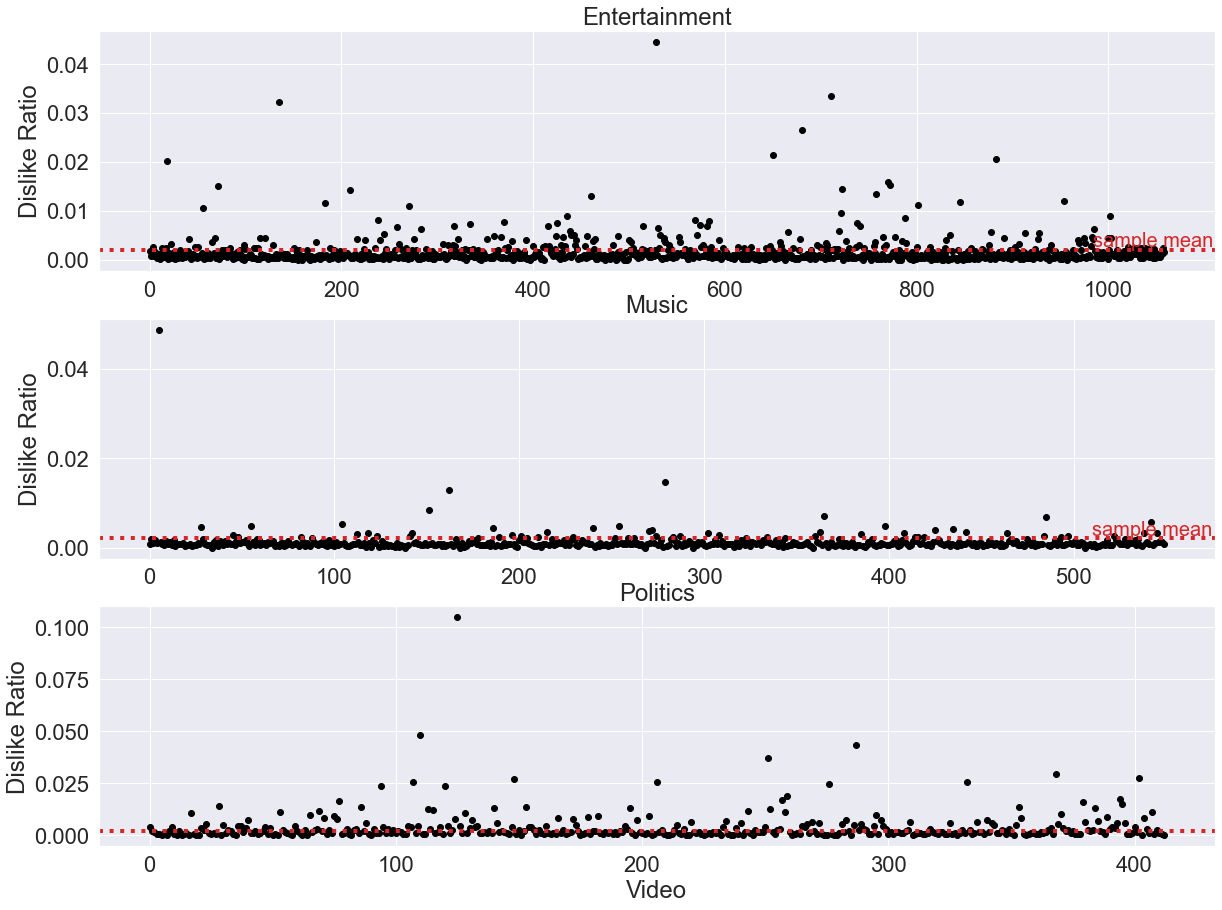

In [33]:
sns.set(font_scale=2)

plt.subplot(3, 1, 1)

plt.plot(df_entertainment['dislike_views_ratio'], 'o', color='black')
plt.axhline(df_videos['dislikes'].mean() / df_videos['views'].mean(), color='tab:red', ls=':', lw=4)
plt.annotate(xy = (df_entertainment.shape[0]+50,
                   (df_videos['dislikes'].mean() / df_videos['views'].mean())+.0005), text='sample mean',
             ha='right', fontsize=20, color='tab:red')

plt.title('Entertainment')
plt.ylabel('Dislike Ratio')

plt.subplot(3, 1, 2)

plt.plot(df_music['dislike_views_ratio'], 'o', color='black')
plt.axhline(df_videos['dislikes'].mean() / df_videos['views'].mean(), color='tab:red', ls=':', lw=4)
plt.annotate(xy = (df_music.shape[0]+25,
                   (df_videos['dislikes'].mean() / df_videos['views'].mean())+.0005), text='sample mean',
             ha='right', fontsize=20, color='tab:red')

plt.title('Music')
plt.ylabel('Dislike Ratio')


plt.subplot(3, 1, 3)

plt.plot(df_politics['dislike_views_ratio'], 'o', color='black')
plt.axhline(df_videos['dislikes'].mean() / df_videos['views'].mean(), color='tab:red', ls=':', lw=4)
plt.annotate(xy = (df_politics.shape[0]+25,
                   (df_videos['dislikes'].mean() / df_videos['views'].mean())+.0005), text='sample mean',
             ha='right', fontsize=20, color='tab:red')

plt.title('Politics')
plt.xlabel('Video')
plt.ylabel('Dislike Ratio')

plt.gcf().set_size_inches(20, 15)

### Why we tried but decided not to present it:
The graph we draw is great in some sense: we can see for music videos, people tend to have more consistent rating, and politics videos people have different attitudes toward it. However, we did not present this graph because the x-axis is index which make a little sense, and the sample size of each category is different. 

# Machine Learning

## Linear Regression

We want to further investgate how likes, dislikes, subsriber, and comment count (these four features are somehow correlated with views as the correlation matrix in the beggining of our report shown) influence views of a video.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x_feat = ['likes', 'dislikes', 'subscriber', 'comment_count']

# data normalization
df_videos_scaled = pd.DataFrame()
for item in df_videos.loc[:, ['likes', 'dislikes', 'subscriber', 
                              'comment_count', 'views']].columns:
    df_videos_scaled[item] = df_videos[item] / df_videos[item].std()
    
y_feat = 'views'
y = df_videos_scaled[y_feat].values

In [35]:
def get_mse(y_true, y_pred):
# calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

In [36]:
def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='y_true')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='y_pred (regression)')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        # compute predicted position
        y_pred_i = slope * x_i + intercept
        
        # plot error
        plt.plot([x_i, x_i], [y_i, y_pred_i], 
                 ls='--', lw=3, color='tab:red',
                 label='error' if idx == 0 else "")
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    
    # compute mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    
    # add title which shows model and MSE
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
    plt.gcf().set_size_inches(10, 5)

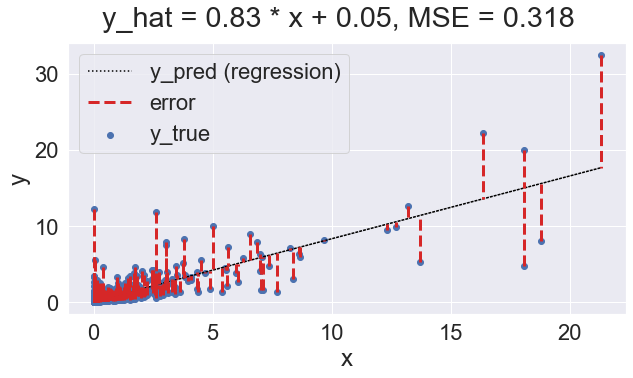

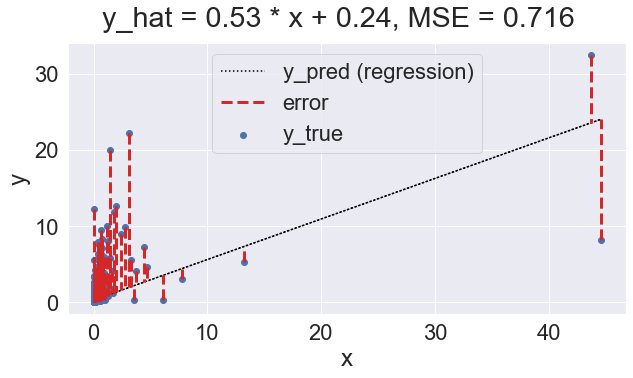

/Users/yidiwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


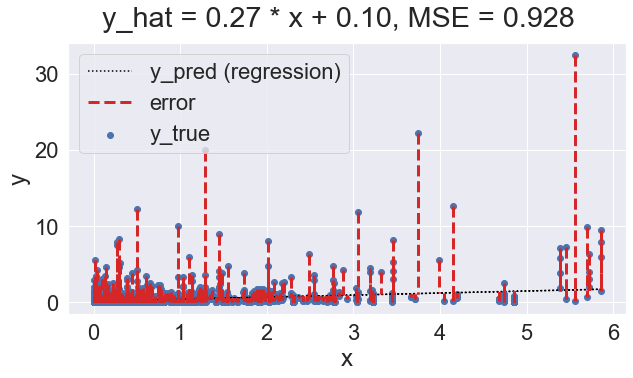

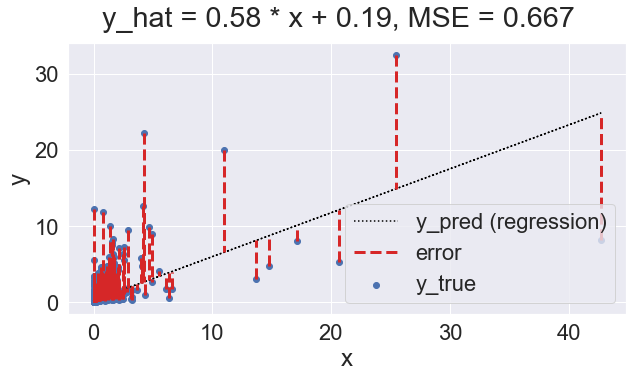

In [37]:
df_regress = pd.DataFrame()

for feat in x_feat:
    # get x feature
    x = df_videos_scaled[feat].values.reshape(-1, 1)
    
    # fit regression
    reg = LinearRegression()
    reg.fit(x, y) 
    
    slope = reg.coef_[0]
    intercept = reg.intercept_

    show_fit(x, y, slope, intercept)

    # computing R2
    y_pred = reg.predict(x)
    
    # store values in the new dateframe
    df_regress.loc[feat, 'r2']= r2_score(y_true=y, y_pred=y_pred)
    df_regress.loc[feat, 'mse']= get_mse(y_true=y, y_pred=y_pred)
    df_regress.loc[feat, 'slope']= slope
    df_regress.loc[feat, 'intercept']= intercept

$$Y = 0.83 * likes + 0.53 * dislikes + 0.27 * subscriber + 0.58 * commentcount$$

In [38]:
df_regress

,r2,mse,slope,intercept
likes,0.681564,0.318362,0.825569,0.049461
dislikes,0.283799,0.716035,0.532728,0.241747
subscriber,0.071657,0.928128,0.267689,0.100222
comment_count,0.332512,0.667333,0.576639,0.187432


As seen in the table above likes yield the highest R^2 and lowest Mean Squared Error. This would indicate that likes has the strongest correlation to views as far as the linear regression goes, likes itself can explain 68% of variance of views in this model. Despite these results we are still skeptical as to if likes truly have the highest correlation to views as the two are inevitably proportional on any given video. As a result we can’t confidently proclaim likes to be indicative of video popularity solely based on the Linear Regression above.  

## Random Forest Regressor

We'd like to use a Random Forest Regressor in a feature importance analysis to identify: Which statistics are responsible for a view of a Youtube video, and by how much. We select y feature views and four x features that are correlated with it as what correlation matrix showed. We choose Random Forest Regressor instead of Random Forest Classifer because we are work with numerical data. If we try to indentify specific "class" or any categorical data, we will use classifer.

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import numpy as np

# initialize k fold
skfold = KFold(n_splits=10)

# define x_feat_list
x_feat_list = ["likes", "dislikes", "comment_count", "subscriber"]

# extract data from dataframe
x = df_videos.loc[:, x_feat_list].values
y = df_videos.loc[:, 'views'].values

# build decision forest regressor
regr = RandomForestRegressor(max_depth=5)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data
    x_test = x[test_idx, :]
    
    # fit data
    regr = regr.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = regr.predict(x_test)

# compute r2
r2_score(y_true=y, y_pred=y_pred)

0.6759897900239682

R2 is the measure of fit in one model, the R2 we get from Random Forest Regressor is around 0.68 which means 68% variance of views can be explained by likes, dislikes, comment_count, and subscriber.

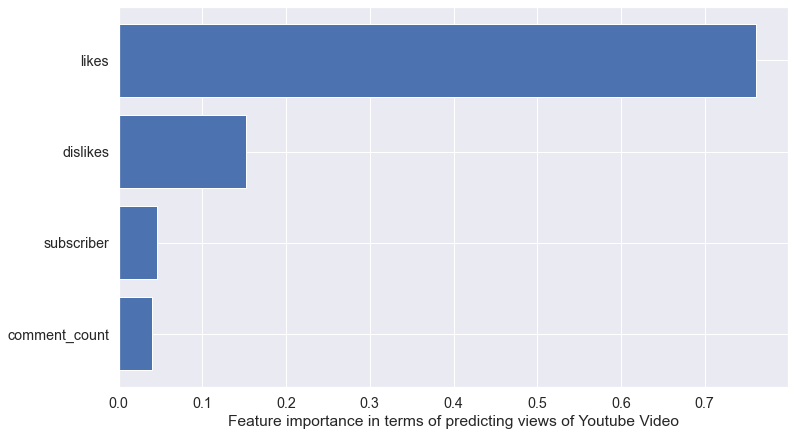

In [40]:
# set font
sns.set(font_scale=1.3)

# define x_feat_list
x_feat_list = ["likes", "dislikes", "comment_count", "subscriber"]

# extract data from dataframe
x = df_videos.loc[:, x_feat_list].values
y = df_videos.loc[:, 'views'].values

# build decision forest regressor
regr = RandomForestRegressor(max_depth=5)

# fit data
regr = regr.fit(x, y)

# sort features in decreasing importance
idx = np.argsort(regr.feature_importances_).astype(int)
feat_list = [x_feat_list[_idx] for _idx in idx]
feat_import = regr.feature_importances_[idx] 

# plot and label feature importance
plt.figure()
plt.barh(feat_list, feat_import)
plt.gcf().set_size_inches(12, 7)
plt.xlabel('Feature importance in terms of predicting views of Youtube Video')
plt.show()

Likes makes the most of contribution of variance of views among this four x features, it is the same as what linear regression model shown. But this graph tells us comment_count contribute to the variance of views the less, while linear regression model says subscriber contribute the less. So the takeaway from this two machine learning method, we can conclude that, likes is the most importance factor that can affect the view of Youtube video, and it is significantly higher than the influence of other numerical factors.

## KNN Classifer and Confusion Matrix we tried

We compare the importance statstics of different categories of videos, like music videos have more consistent rating, and entertainment videos have the largest proportion etc. So we start to think of, can we train our data, and let machine learning to predict the types of video based upon the different traits they have. Imagine that if a video have overlap of genre, the algorithm can automatically classifer it to certain category. So we used KNN classifer and cross validated our data, use the numerical data including the title_special_score and title_polarity we computed to predict categorical_id. We visualized our outcome by confusion matrix to see the overall performance, the performance on each category, what is the category that is commonly mistaken for.

In [41]:
from sklearn.model_selection import StratifiedKFold
from copy import copy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from collections import Counter

k = 1
x_feat_list = ['views', 'likes', 'dislikes', 'tags_count', 'title_special_score', 'subscriber', 
               'comment_count', 'title_polarity']

y_feat = 'category_id'

x = df_videos.loc[:, x_feat_list].values
y_true = df_videos.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=3)

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    print(Counter(y_true_train))
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = knn_classifier.predict(x_test)
    

Counter({24: 706, 10: 367, 25: 276, 26: 272, 23: 246, 22: 198, 17: 196, 28: 180, 1: 138, 27: 112, 15: 73, 2: 44, 20: 34, 19: 30, 29: 8, 43: 2})
Counter({24: 706, 10: 366, 25: 275, 26: 273, 23: 245, 22: 199, 17: 197, 28: 181, 1: 138, 27: 112, 15: 73, 2: 43, 20: 34, 19: 31, 29: 8, 43: 1})
Counter({24: 706, 10: 367, 25: 275, 26: 273, 23: 245, 22: 199, 17: 197, 28: 181, 1: 138, 27: 112, 15: 72, 2: 43, 20: 34, 19: 31, 29: 8, 43: 1})


/Users/yidiwang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Accuracy Score:  0.3571593800601434


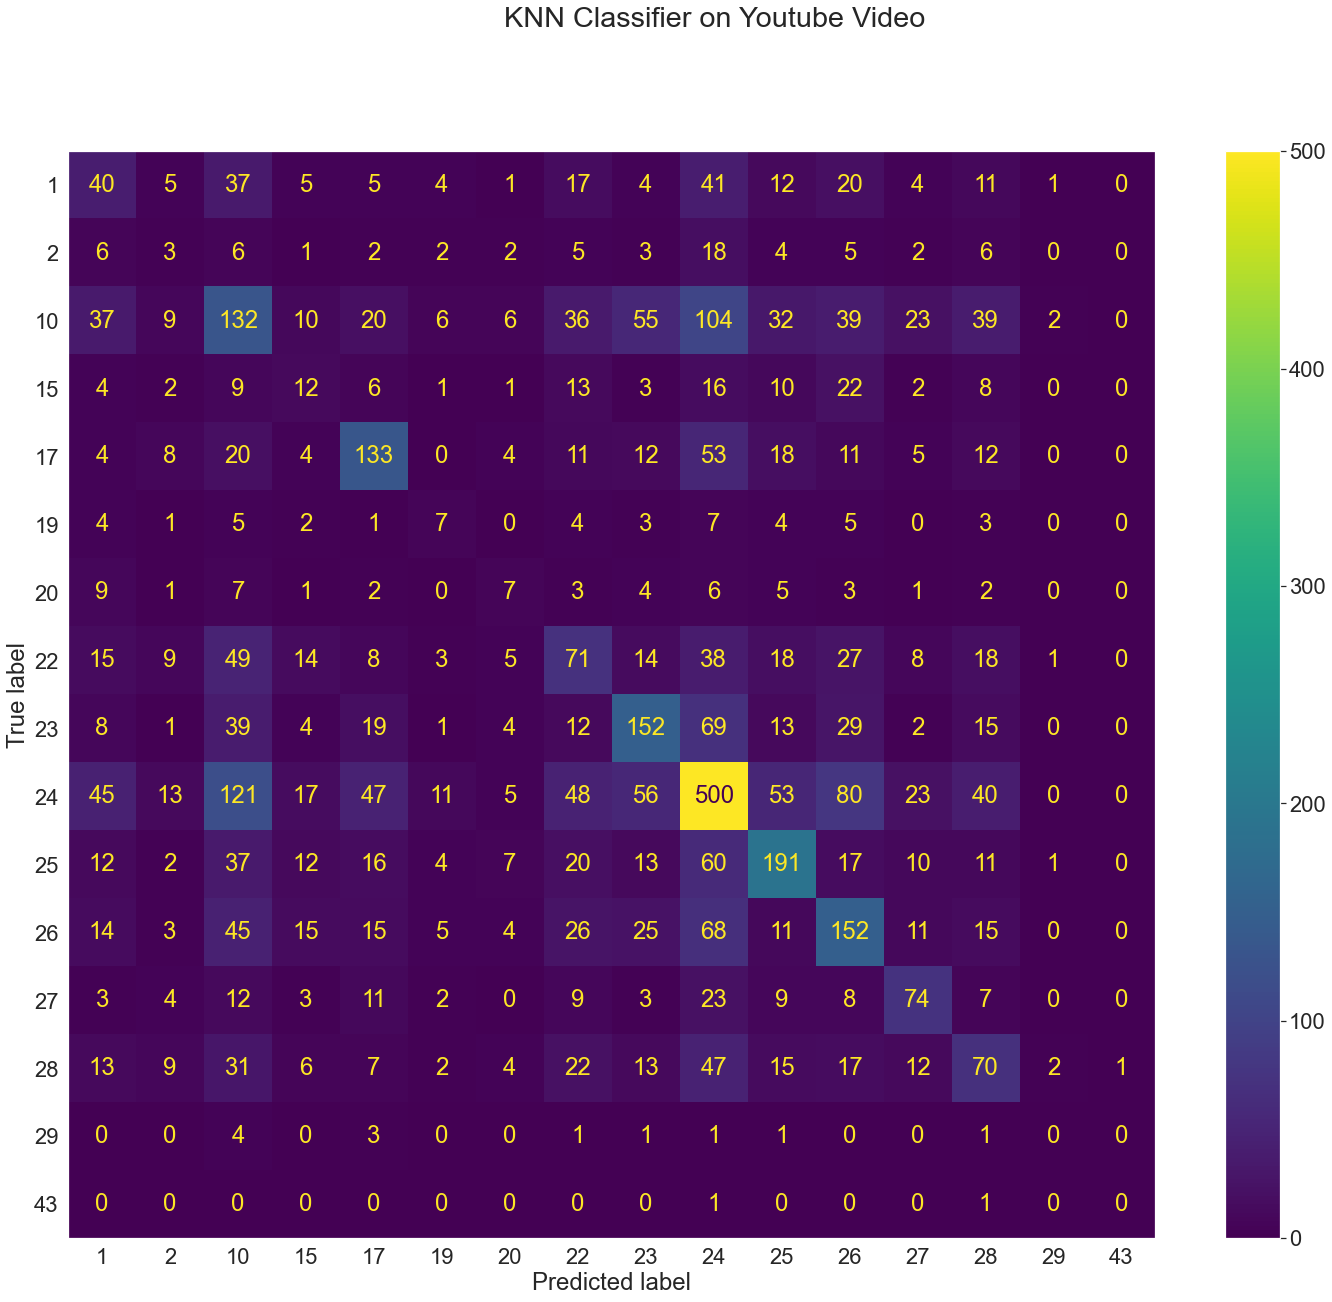

In [42]:
# build and plot confusion matrix
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))

sns.set(font_scale=2)
conf_mat_disp.plot()
plt.suptitle('KNN Classifier on Youtube Video')
plt.gcf().set_size_inches(25, 20)
plt.grid(False)

# get accuracy score
print('Accuracy Score: ', accuracy_score(y_true, y_pred))

However, we only have accuracy around 36% so we did not present this model. We think it probably because there are many other types of video have similar traits and data distribution than the three types we compared. So it is easily for machine mistakenly classify them. Also, the variance of videos in the same category is truly large and it will be more difficult for us to implement our idea about classify different types of Youtube video.

# Discussion

We started this project wanting to predict clickbait. However, overtime we realized that video clickbait is hard to categorize as a binary. A clickbait can be considered as an outlier. We at first were looking for the outliers in the group that had high amount of views as well as high dislike ratio. The higher the ratio the more negative we thought the perception of it was, and this would garner more attention. However, overtime we were unable to find the relation between video and clickbait status as pertains to this ratio. 

At first, we thought that titles were the key to high viewership and "gaming" the recommendation system on YouTube was possible through title manipulation. For example, if a content creator makes a title that stands out using rarely used punctuation or characters such as  "YOU'LL NEVER BELIEVE WHAT HAPPENED NEXT!!!". Although it may seem that from an outsiders perspective that this would be successful as a strategy, we found there was no correlation here, and thus surprisingly rejected this hypothesis.  

In our endeavor to categorize what makes a video successful, we had the hypothesis that in the description of videos, the number of overall tags might have something to do with the video success. Interestingly, we found there was a negative correlation of views and the tags of a video. At one point, in the zeitgeist of what YouTubers thought made them successful was the number of tags. Now it seems that this strategy is a not a viable one to climb the rank the YouTube most watched. 

Finally, we tried to use sentiment analysis to try to visualize the hypothesized relationship between views and polarity of video titles and tags. Looking at the graph between sentiment and views, there was a normally distributed relationship around neutrality rather than the polar ends of the sentiment scale. At first this result was surprising, but given that the algorithm has been said by the company to value retention time, it would be more advantageous to the company to show non polarizing topics in the recommendations feed. In summary, this finding of neutrality in videos titles and tags reinforces the idea that viewers like what they are comfortable watching and YouTube is comfortable recommending. People choose what they like and are comfortable with. People do not choose videos that are very polarizing / controversial.

In our linear regression we were trying to investigate the relationship between subscribers, likes, comment count and dislikes with views. We thought that the investigation would result in comments disabled meaning that the video was controversial and therefore may have a higher view count. Again we were surprised that this was not the case. The only clear outcome was that the variation in the views was clearly explained by the likes with high R^2 value. We were not able to link any other cause to the views. 


Finally confirming our results, our Random Forest Regressor confirmed our findings that likes are correlated with views. The second most important was the dislikes, which may point to a slight bias towards controversy, although likes were likely resulting in the higher dislike count. In other words, if likes are high dislikes are also high. The like to dislike ratio seems to be positively correlated with views, a very self explanatory correlation. It appears that YouTube rewards those videos that have a high like count and the dislikes are not rewarded, but display a high feature importance because likes increase with dislike increase as well.  

The accuracy score of our KNN Classifier with cross validation to predict the category based on the different features of a video was relatively low, once again endorsing the idea that YouTube is a meritocracy was than a system that cannot be gamed by a short term strategy such as clickbait, controversial tags, or flashy titles.

## Takeaway
Our main take away is that YouTube rewards likability and hard work to achieve viewer favor rather than any short term strategy such as clickbait, flashy titles, controversy (shown by dislike ratio / sentiment analysis), or amount of tags. Our hypotheses revolved around the idea that outward displays of appearance would trump this rather simple strategy of just getting the viewers to like the content creator. We found little correlation here with outward appearances of a video with regression. This points to the content of the video being the most important feature, something that is extremely difficult to qualify in our analysis.  Our feature importance showed that likes were the main feature driving high view counts. Perhaps this feature is the one that displays inner content of a video closer than any other feature.

The take away here for YouTube wannabes or content creators is that there is no way around being likable and providing a viewer experience that is worth watching (the value offered). The YouTube recommendation system seems to favor basic things such as the content within and likes. It is therefore recommended that content creators avoid getting lost in how they think a video will be clicked on and are better off focusing their efforts on the content of the video and its perception when watched. If these two things, perception and quality of content are perfected a larger view count can be expected.

## Ethical consideration and future investigation

There could be more investigation into narrowing down the data set into categories on youtube. Each category might have clickbait that works for different reasons. Further
There could be more to the sentiment scores if broken down into different categories such as anger, sadness, etc and they might . we also
How to make our model more unbiased and generic, able to apply it into data set from different regions

In our analysis, we only looked at data that is for an United States audience of highest viewed videos. Surprisingly, there were actually some non-english videos in our data set. The vast majority of the videos were in English and it did not seem to effect our model for the ones that were in different languages. We did not notice this at first because of the small quantity of these videos in our data set. It may be that different languages favor different features or have different algorithms / less sound ways of recommending videos. The only way to tell is to do a similar regression analysis on different regions of the world that are non english speaking. This would be a future investigation were we could translate the tags or do the regression on another data set from a non-english country.

It may be that videos in different languages across different countries could use their titles to clickbait and perhaps use the short term methods discussed before to game the system. The only way we can find this out is that we would have to do a similar analysis for other countries data set. We don't know if the algorithm is English bias or not, or if it is just different in general. It may be that it is the same, and uses not language based ways to quantify the value of the video through retention time and likes of the video. Again the only way to know is if we do a analysis on another country in which we have data for. 

Viewing YouTube as a whole, it seems that past mistakes by 2018, when this data set was released, have been fixed. For the most part, it clearly seems that YouTube does not value the outer appearance of the video, but rather it values the content contained in it and how it makes an impression on the audience. A good impression (likes and viewer retention) is most likely tied to the viewer count. This could be an ethical concern when thinking about videos that contain false information but still leaves a good impression on the viewer. Some examples of such videos are conspiracy/fringe/cult videos. These videos could leave a good impression but are ultimately disinformation. Just because a crowd of viewers likes a a video and watches all the way through does not necessarily mean that it is pro-social. It could be the very opposite and there are many examples an average viewer will stumble across.

We were surprised that YouTube has a relatively sound way of finding what videos provide value to their watchers. This is seen by the likes and views being correlated in our regression; but there is a darker side that warrants future investigation on a smaller data set of these videos that can deceptively leave a good impression.